Q1

In [3]:
import numpy as np

def generate_xor_data():
    X = [(i,j) for i in [0,1] for j in [0,1]]
    y = [int(np.logical_xor(x[0], x[1])) for x in X]
    return X, y
    
print(generate_xor_data())


([(0, 0), (0, 1), (1, 0), (1, 1)], [0, 1, 1, 0])


In [4]:
X,y = generate_xor_data()
X_array = np.array(X)


In [5]:
## defining non-linearities

def f1(x):
    if np.dot(W1,x) > 0:
        y_hat1 = 1
    else:
        y_hat1 = 0
    return y_hat1

def f2(x):
    if np.dot(W2,x) > 0:
        y_hat2 = 1
    else:
        y_hat2 = 0
    return y_hat2

def f3(x):
    if np.dot(W3,x) > 0:
        y_hat3 = 1
    else:
        y_hat3 = 0
    return y_hat3


In [6]:
W1 = [-1, 1]
W2 = [1, -1]
W3 = [1, 1]

b1 = 0
b2 = 0
b3 = 0


table = np.empty([4,1])
count = 0

# performs the XOR computation
for x in X_array:
    
    y_hat1 = f1(x)
    y_hat2 = f2(x)
    y_hat3 = f3(np.array([y_hat1, y_hat2]))
    print(y_hat3)
    table[count,0] = y_hat3
    count = count+1


0
1
1
0


Q2

In [7]:
## Function that generates the training and testing data
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(n_points, noise=1.0):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

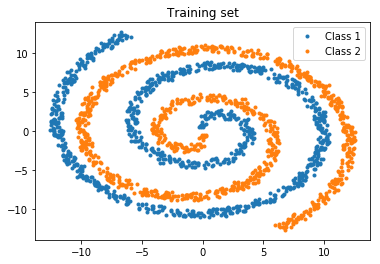

In [8]:
## Training Data

X_train, y_train = generate_spiral_data(1000)

plt.title('Training set')
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], '.', label='Class 1')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], '.', label='Class 2')
plt.legend()
plt.show()

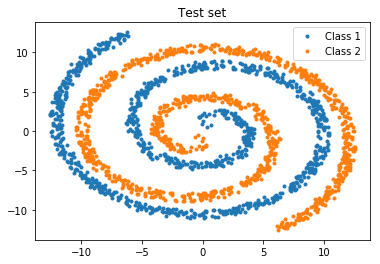

In [9]:
## Test Data


X_test, y_test = generate_spiral_data(1000)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.', label='Class 1')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.', label='Class 2')
plt.legend()
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense

## MY MODIFIED MODEL
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
                  optimizer='Adam', 
                  metrics=['accuracy'])


## DEFINE A BAD MODEL - EXAMPLE
bad_model = Sequential()
bad_model.add(Dense(12, input_dim=2, activation='tanh'))
bad_model.add(Dense(1, activation='sigmoid'))

bad_model.compile(loss='mean_squared_error',
                  optimizer='SGD', # SGD = Stochastic Gradient Descent
                  metrics=['accuracy'])

#Train the model
model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)
bad_model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

In [11]:
# Test the new model
prediction = np.round(model.predict(X_test).T[0])
# Test the bad model
bad_prediction = np.round(bad_model.predict(X_test).T[0])

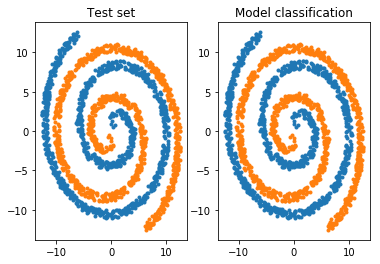

In [14]:
# Visualize performance
plt.subplot(1,2,1)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
plt.subplot(1,2,2)

plt.title('Model classification')
plt.plot(X_test[prediction==0,0], X_test[prediction==0,1], '.')
plt.plot(X_test[prediction==1,0], X_test[prediction==1,1], '.')

plt.show()

In [13]:
## Function to plot the decision boundary
def plot_decision_boundaries(good_model, bad_model):
    # Generate grid:
    line = np.linspace(-15,15)
    xx, yy = np.meshgrid(line,line)
    grid = np.stack((xx,yy))

    # Reshape to fit model input size:
    grid = grid.T.reshape(-1,2)

    # Predict:
    good_prediction = good_model.predict(grid)
    bad_prediction = bad_model.predict(grid)

    # Reshape to grid for visualization:
    plt.title("Good Decision Boundary")
    good_prediction = good_prediction.T[0].reshape(len(line),len(line))
    plt.contourf(xx,yy,good_prediction)
    plt.show()

    plt.title("Bad Decision Boundary")
    bad_prediction = bad_prediction.T[0].reshape(len(line),len(line))
    plt.contourf(xx,yy,bad_prediction)
    plt.show()

# Call the function above to generate the plot below


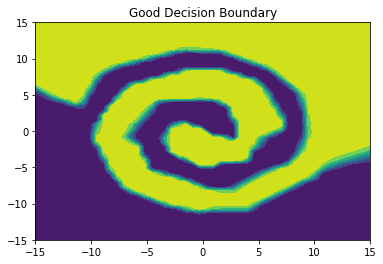

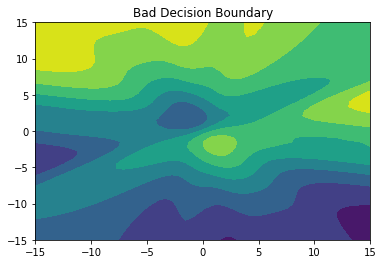

In [47]:
plot_decision_boundaries(model, bad_model)


Q3

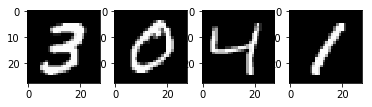

3 0 4 1


In [15]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

"""
Returns:
2 tuples:

x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).
"""

# Show example data
plt.subplot(1,4,1)
plt.imshow(x_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,2)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,3)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,4)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

print(y_train[7,],y_train[1,],y_train[2,],y_train[3,])

In [16]:
## Function that plots the predicitons of your CNN
def plot_mnist_predictions(cnn_model, x_test):
    y_predict = cnn_model.predict(x_test, verbose=0)
    y_predict_digits = [np.argmax(y_predict[i]) for i in range(y_predict.shape[0])]
    plt.subplot(1,4,1)
    plt.imshow(x_test[0,:,:,0], cmap=plt.get_cmap('gray'))
    plt.subplot(1,4,2)
    plt.imshow(x_test[1,:,:,0], cmap=plt.get_cmap('gray'))
    plt.subplot(1,4,3)
    plt.imshow(x_test[2,:,:,0], cmap=plt.get_cmap('gray'))
    plt.subplot(1,4,4)
    plt.imshow(x_test[3,:,:,0], cmap=plt.get_cmap('gray'))
    plt.show()

    print("CNN predictions: {0}, {1}, {2}, {3}".format(y_predict_digits[0],
                                                       y_predict_digits[1],
                                                       y_predict_digits[2],
                                                       y_predict_digits[3]))

In [18]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

batch_size = 128
num_classes = 10
epochs = 12

"""
We need to add a channel dimension
to the image input.
"""
x_train = x_train.reshape(x_train.shape[0],
                          x_train.shape[1],
                          x_train.shape[2],
                          1)
x_test = x_test.reshape(x_test.shape[0],
                        x_test.shape[1],
                        x_test.shape[2],
                        1)


"""
Train the image using 32-bit floats normalized
between 0 and 1 for numerical stability.
"""

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
input_shape = (x_train.shape[1], x_train.shape[2], 1)

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Initializing model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss= 'categorical_crossentropy',
              optimizer= 'Adadelta',
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


ValueError: Error when checking target: expected dense_10 to have 2 dimensions, but got array with shape (60000, 10, 10)

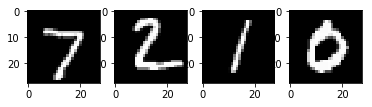

CNN predictions: 0, 0, 0, 0


In [66]:
plot_mnist_predictions(model, x_test)